Available columns: Index(['daily_usage_hours', 'site_categories_visited', 'sessions_per_day'], dtype='object')


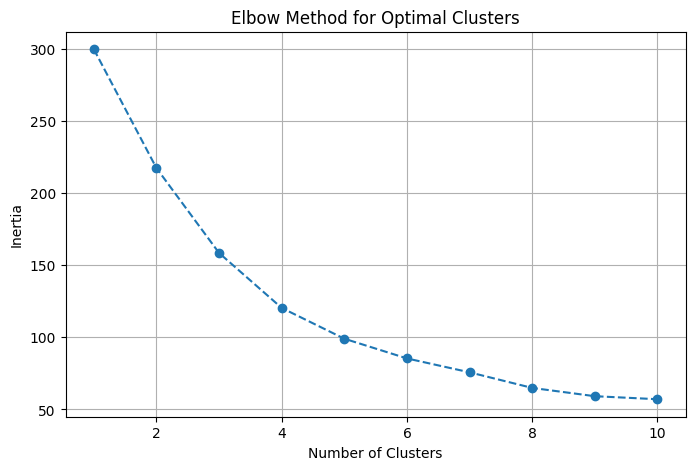

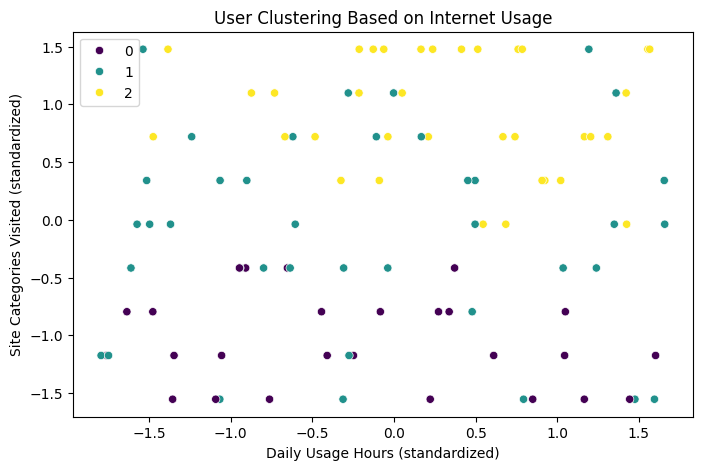

   daily_usage_hours  site_categories_visited  sessions_per_day  Cluster
0           9.884957                        2                13        0
1           1.023220                        9                 1        1
2          10.394205                        9                 3        1
3           5.990237                        6                16        2
4           3.558451                        4                 4        1


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset (update filename as needed)
df = pd.read_csv("/content/internet_usage.csv")

# Display column names for reference
print("Available columns:", df.columns)

# Selecting relevant columns with correct names
X = df[['daily_usage_hours', 'site_categories_visited', 'sessions_per_day']]

# Handling missing values
X = X.dropna()

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding optimal clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.grid()
plt.show()

# Applying K-Means clustering (choosing k=3 for example)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette="viridis")
plt.xlabel("Daily Usage Hours (standardized)")
plt.ylabel("Site Categories Visited (standardized)")
plt.title("User Clustering Based on Internet Usage")
plt.legend()
plt.show()

# Displaying sample data with cluster assignments
print(df.head())
